<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook shows the large trends over the data and compares entire selections with each other.

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](http://syzygy.ca) and for help with this notebook. -- I. Heisz

In [1]:
import numpy as np
import pandas as pd
import sys

## Bring in a selection of the NSERC awards data starting with 1995 and ending with 2016.
## Throw away as much as you can to keep the DataFrame small enough to manipulate using a laptop.

df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so if it was 2017 it means we include the 2016 collection but not 2017.

for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, 
                               compression='gzip', 
                               usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 17], 
                               encoding='latin-1'
                              )
                  )
    print(year)
 
## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'Committee'] 

## Strip out any leading or trailing whitespace
df.columns.str.strip()

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


Index(['Name', 'Department', 'OrganizationID', 'Institution', 'ProvinceEN',
       'CountryEN', 'FiscalYear', 'AwardAmount', 'ProgramID', 'Committee'],
      dtype='object')

In [2]:
## Quantify data stored in memory.
print("DataFrame: {:4.2f} Mb".format(sys.getsizeof(df) / (1024. * 1024)))

DataFrame: 207.20 Mb


## Information about the Distribution of Wealth Among Researcher's Funding

In [3]:
# If you do more than one year at a time you risk crashing the kernel, 
# the distribution is very similar year to year.
year = 2016 # Year you want to select for
selectedYearData = df.loc[(df['FiscalYear'] == year)] # Gets the data for the selected year

# The sum of all awards that each individual has received (during the selected year)
individualAwardSum = selectedYearData.groupby(['Name'])['AwardAmount'].transform('sum')

# Make a new column to show each researchers total awards received
selectedYearData = selectedYearData.assign(TotalAward = individualAwardSum)

# Drop the duplicate names, now that we have the award amount info from them.
deduplicatedData = selectedYearData.drop_duplicates(subset = 'Name')

# Sort by total award for the given year
byAwardAmount = deduplicatedData.sort_values(by=['TotalAward'], ascending=[True])

In [4]:
## Statistical information about a specific column in the data

# Change this value to get information about the column you are interested in
columnYouWantInformationOn = 'AwardAmount'

mean = df[columnYouWantInformationOn].mean()
print('The mean of ' + str(columnYouWantInformationOn) + ' is ' + str(mean))

median = df[columnYouWantInformationOn].median()
print('The median of ' + str(columnYouWantInformationOn) + ' is ' + str(median))

standardDeviation = df[columnYouWantInformationOn].std()
print('The standard deviation of ' + str(columnYouWantInformationOn) + ' is ' + str(standardDeviation))

The mean of AwardAmount is 38118.8182775
The median of AwardAmount is 21000.0
The standard deviation of AwardAmount is 141524.555172


### Wealth Distribution Plot

In [5]:
## Imports For Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
!pip3 install plotly --user: #Plotly for interactive graphing
import plotly.plotly as py
import plotly.graph_objs as go


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --user:


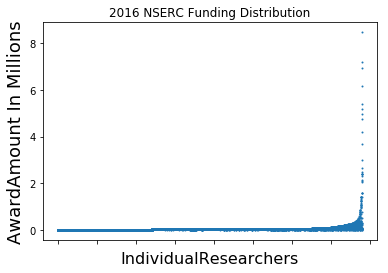

In [6]:
## Note: this is a static plot with hardcoded variables which are not meant to be changed.
## It is also processing a lot of data so it may take a minute.

axes = plt.gca() # creates the axes

## y axis
yAxis = 'AwardAmount'
y = byAwardAmount[yAxis]
y = y/10**6 # scales y
plt.ylabel(yAxis+' In Millions', fontsize=18) # y axis label

## x axis
x = range(byAwardAmount.shape[0])
plt.xlabel('IndividualResearchers', fontsize=16) # x axis label
axes.set_xticklabels([]) # make it so the x axis is not numbered

plt.title(str(year) + ' NSERC Funding Distribution') # plot title
plot = plt.scatter(x,y,s=1) # make the plot
plt.show() # draw the plot